In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir('/content/drive/MyDrive')

['Contact Information.gform',
 'Hotels-UTF8.gsheet',
 'Colab Notebooks',
 'Classroom',
 '2000839885.pdf',
 'EPIC',
 'final_dataset',
 'dataset_split']

In [ ]:
os.listdir('/content/drive/MyDrive/dataset_split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/dataset_split/train')

['Building', 'Car', 'Lab', 'Person', 'Tree']

In [ ]:
os.listdir('/content/drive/MyDrive/dataset_split/val')

['Building', 'Car', 'Lab', 'Person', 'Tree']

In [ ]:
os.listdir('/content/drive/MyDrive/dataset_split/test')

['Building', 'Car', 'Lab', 'Person', 'Tree']

In [ ]:
import os, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/dataset_split/train"
VAL_DIR   = "/content/drive/MyDrive/dataset_split/val"
TEST_DIR  = "/content/drive/MyDrive/dataset_split/test"

assert os.path.isdir(TRAIN_DIR) and os.path.isdir(VAL_DIR) and os.path.isdir(TEST_DIR)

In [ ]:
IMG_SIZE = (224, 224)
BATCH = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode="int"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode="int"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode="int",
    shuffle=False
)

class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000, seed=SEED).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 2350 files belonging to 5 classes.
Found 509 files belonging to 5 classes.
Found 512 files belonging to 5 classes.
Classes: ['Building', 'Car', 'Lab', 'Person', 'Tree']


## BaseLine Model ( weights=None , dropout = 0.2 , 128 )

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = layers.Rescaling(1./255)(inputs)

base = VGG16(include_top=False, weights=None, input_tensor=x)

base.trainable = True

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 14,780,997 (56.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.2088 - loss: 1.6098 - val_accuracy: 0.1866 - val_loss: 1.6150
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 556ms/step - accuracy: 0.2031 - loss: 1.6104 - val_accuracy: 0.1159 - val_loss: 1.6098
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 544ms/step - accuracy: 0.2115 - loss: 1.6093 - val_accuracy: 0.1866 - val_loss: 1.6185
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.2269 - loss: 1.6146 - val_accuracy: 0.1827 - val_loss: 1.6096
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 545ms/step - accuracy: 0.1915 - loss: 1.6096 - val_accuracy: 0.1827 - val_loss: 1.6091
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.2139 - loss: 1.6091 - val_accuracy: 0.2024 - val_loss: 1.6083
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.2697 - loss: 1.5254 - val_accuracy: 0.4617 - val_loss: 1.2489
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 548ms/step - accuracy: 0.4167 - loss: 1.2929 - val_accura

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Baseline Test Accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.6872 - loss: 0.8019
Baseline Test Accuracy: 0.736328125


## Fine Tuning ( 32 , callbacks )

In [ ]:
inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = layers.Rescaling(1./255)(inputs)

base2 = VGG16(include_top=False, weights=None, input_tensor=x)

base2.trainable = True

x = layers.GlobalAveragePooling2D()(base2.output)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model2 = keras.Model(inputs, outputs)
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,731,269 (56.20 MB)

 Trainable params: 14,731,269 (56.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.3, min_lr=1e-7)
early_stop2 = keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

In [ ]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[reduce_lr, early_stop2]
)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.7870 - loss: 0.5713 - val_accuracy: 0.8114 - val_loss: 0.4636 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.8016 - loss: 0.5343 - val_accuracy: 0.7996 - val_loss: 0.5255 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 560ms/step - accuracy: 0.8228 - loss: 0.5134 - val_accuracy: 0.8134 - val_loss: 0.4785 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 556ms/step - accuracy: 0.8472 - loss: 0.4353 - val_accuracy: 0.8605 - val_loss: 0.3653 - learning_rate: 3.0000e-05
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 561ms/step - accuracy: 0.8630 - loss: 0.3860 - val_accuracy: 0.8684 - val_loss: 0.3660 - learning_rate: 3.0000e-05
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 563ms/step - accuracy: 0.8658 - loss: 0.3836 - val_accuracy: 0.8743 - val_loss: 0.3576 - learning_rate: 3.0000e-05
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 563ms/step - acc

In [ ]:
test_loss, test_acc = model2.evaluate(test_ds)
print(" model2 Test Accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.9293 - loss: 0.2593
 model2 Test Accuracy: 0.919921875


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model2.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report (Mixup Model):
              precision    recall  f1-score   support

    Building       0.87      0.95      0.91        93
         Car       0.97      0.92      0.94       128
         Lab       0.85      0.92      0.88        61
      Person       0.90      0.86      0.88        88
        Tree       0.96      0.94      0.95       142

    accuracy                           0.92       512
   macro avg       0.91      0.92      0.91       512
weighted avg       0.92      0.92      0.92       512



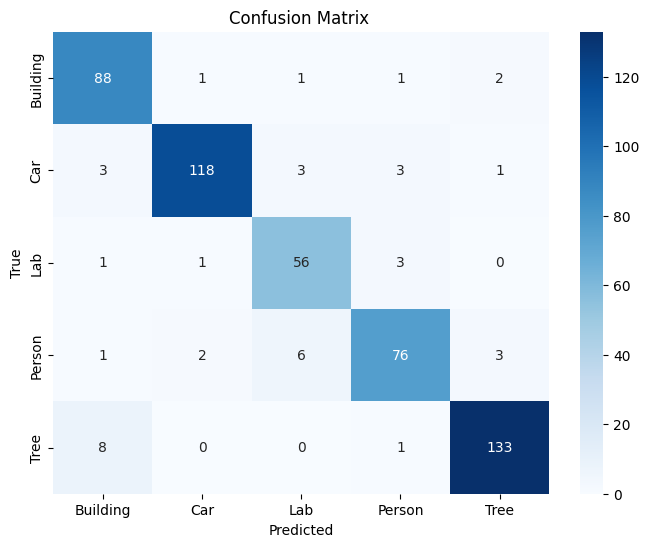

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

## Novelty

In [ ]:
from tensorflow.keras import layers, models

def squeeze_excite_block(input_tensor, ratio=16):
    init = input_tensor
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = layers.GlobalAveragePooling2D()(init)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = layers.Multiply()([init, se])
    return x

In [ ]:
from tensorflow.keras.applications import VGG16

inputs = layers.Input(shape=(224, 224, 3))

x = layers.Rescaling(1./255)(inputs)

base_model = VGG16(include_top=False, weights=None, input_tensor=x)

# 4. إضافة Attention بعد آخر بلوك في VGG16 (Novelty)
x = squeeze_excite_block(base_model.output)

# 5. الرأس الهجين (Hybrid Head: GAP + GMP) لرفع الدقة
avg_pool = layers.GlobalAveragePooling2D()(x)
max_pool = layers.GlobalMaxPooling2D()(x)
merged = layers.Concatenate()([avg_pool, max_pool])

# 6. طبقات التصنيف المتقدمة مع Regularization
x = layers.BatchNormalization()(merged)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model_n = models.Model(inputs, outputs)

# تجميد الطبقات الأساسية في البداية
base_model.trainable = False

In [ ]:
model_n.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_n.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_7         │ (None, 224, 224,  │          0 │ input_layer_11[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ rescaling_7[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0

 Total params: 29,771,089 (113.57 MB)

 Trainable params: 7,377,925 (28.14 MB)

 Non-trainable params: 7,637,312 (29.13 MB)

 Optimizer params: 14,755,852 (56.29 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7)
]

print("Training the Custom Head...")
history_2 = model_n.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=callbacks)

# المرحلة 2 (Fine-Tuning): فك تجميد آخر بلوكين للتدريب الدقيق
base_model.trainable = True
# تجميد أول 15 طبقة فقط
for layer in base_model.layers[:15]:
    layer.trainable = False

model_n.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Fine-tuning the model...")
history_fine = model_n.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)

Training the Custom Head...
Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.7514 - loss: 0.6791 - val_accuracy: 0.4637 - val_loss: 1.2149 - learning_rate: 0.0010
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.7657 - loss: 0.6063 - val_accuracy: 0.4165 - val_loss: 1.4406 - learning_rate: 0.0010
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.7858 - loss: 0.5728 - val_accuracy: 0.6130 - val_loss: 0.9291 - learning_rate: 0.0010
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - accuracy: 0.8274 - loss: 0.4840 - val_accuracy: 0.6582 - val_loss: 0.9766 - learning_rate: 0.0010
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.8387 - loss: 0.4653 - val_accuracy: 0.6365 - val_loss: 0.9202 - learning_rate: 0.0010
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.8352 - loss: 0.4333 - val_accuracy: 0.5403 - val_loss: 1.9420 - learning_rate: 0.0010
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step -

In [ ]:
print("Evaluating on Test Data...")
test_loss, test_accuracy = model_n.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Evaluating on Test Data...
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9398 - loss: 0.2085
Test Accuracy: 93.36%
Test Loss: 0.2223


In [ ]:
y_pred2 = model_n.predict(test_ds)
y_pred2_classes = np.argmax(y_pred2, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred2_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Building       0.92      0.94      0.93        93
         Car       0.95      0.95      0.95       128
         Lab       0.91      0.97      0.94        61
      Person       0.94      0.84      0.89        88
        Tree       0.94      0.96      0.95       142

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512



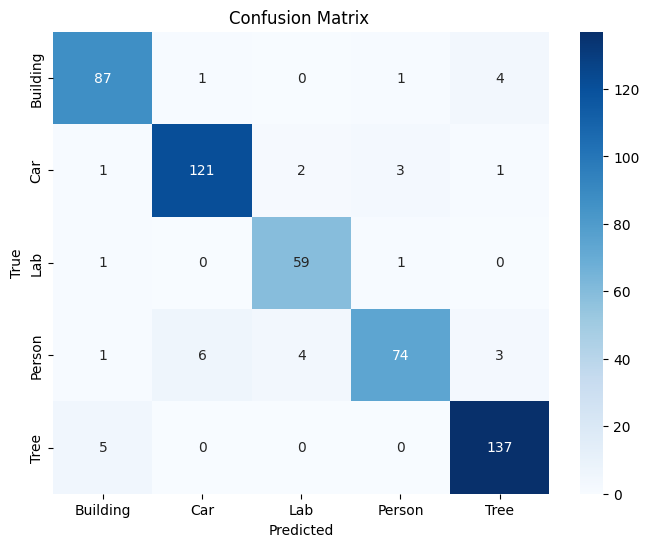

In [ ]:
cm = confusion_matrix(y_true, y_pred2_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

## with weights = imagenet

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
inputs = keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = layers.Lambda(preprocess_input)(inputs)

base3 = VGG16(include_top=False, weights="imagenet", input_tensor=x)

base3.trainable = True

x = layers.GlobalAveragePooling2D()(base3.output)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model3 = keras.Model(inputs, outputs)
model3.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,731,269 (56.20 MB)

 Trainable params: 14,731,269 (56.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [ ]:
history3 = model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[reduce_lr, early_stop2]
)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 648ms/step - accuracy: 0.5573 - loss: 1.1036 - val_accuracy: 0.8350 - val_loss: 0.5460 - learning_rate: 1.0000e-04
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.8744 - loss: 0.3620 - val_accuracy: 0.9666 - val_loss: 0.1095 - learning_rate: 1.0000e-04
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 573ms/step - accuracy: 0.9414 - loss: 0.2062 - val_accuracy: 0.9646 - val_loss: 0.0953 - learning_rate: 1.0000e-04
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 572ms/step - accuracy: 0.9636 - loss: 0.1211 - val_accuracy: 0.9411 - val_loss: 0.1814 - learning_rate: 1.0000e-04
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 569ms/step - accuracy: 0.9670 - loss: 0.1063 - val_accuracy: 0.9568 - val_loss: 0.1289 - learning_rate: 1.0000e-04
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 574ms/step - accuracy: 0.9749 - loss: 0.0700 - val_accuracy: 0.9882 - val_loss: 0.0413 - learning_rate: 3.0000e-05
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 571ms/step - acc

In [ ]:
test_loss, test_acc = model3.evaluate(test_ds)
print(" model Test Accuracy:", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.9933 - loss: 0.0212
 model Test Accuracy: 0.994140625


In [ ]:
y_pred3 = model3.predict(test_ds)
y_pred3_classes = np.argmax(y_pred3, axis=1)
y_true = np.concatenate([y for x, y in test_ds], axis=0)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred3_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    Building       0.99      0.99      0.99        93
         Car       1.00      0.99      1.00       128
         Lab       0.98      1.00      0.99        61
      Person       0.99      1.00      0.99        88
        Tree       1.00      0.99      1.00       142

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512



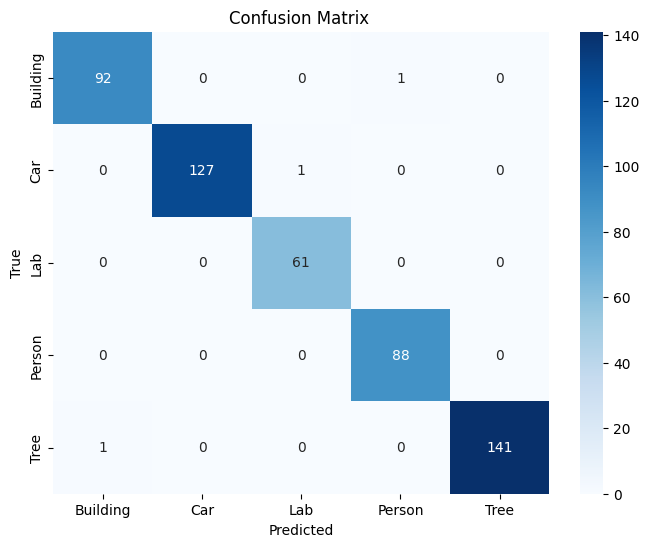

In [ ]:
cm = confusion_matrix(y_true, y_pred3_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()